## PCA / Interest Rate -- HW2 Solution Write-up

This simple Write-up notebook shows necessary code and explanations are not included here. Students' submission needs to display analysis and comments.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
import re
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
# from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'seaborn'

### Step 1. Read the data session_2_homework_data.csv

In [2]:
os.getcwd()

'/Users/christoherrosin/Desktop/Machine Learning GA/Homework Solution'

In [3]:
data = pd.read_csv('session_2_homework_data.csv')

In [4]:
data.head(10)

,Date,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR,Output1,Easing,Tightening
0,1/5/1981,13.52,13.09,12.289,12.28,12.294,12.152,11.672,18.015526,NaN,NaN
1,1/6/1981,13.58,13.16,12.429,12.31,12.214,12.112,11.672,18.091398,NaN,NaN
2,1/7/1981,14.50,13.90,12.929,12.78,12.614,12.382,11.892,19.447314,NaN,NaN
3,1/8/1981,14.76,14.00,13.099,12.95,12.684,12.352,11.912,19.748510,NaN,NaN
4,1/9/1981,15.20,14.30,13.539,13.28,12.884,12.572,12.132,20.572042,NaN,NaN
5,1/12/1981,15.22,14.23,13.179,12.94,12.714,12.452,12.082,20.142185,NaN,NaN
6,1/13/1981,15.24,14.10,13.309,12.97,12.684,12.532,12.082,20.181543,NaN,NaN
7,1/14/1981,15.08,13.90,12.959,12.75,12.614,12.532,12.072,19.777288,NaN,NaN
8,1/15/1981,15.25,14.09,13.259,13.02,12.774,12.622,12.252,20.298884,NaN,NaN
9,1/16/1981,15.15,13.98,13.089,12.85,12.664,12.532,12.132,19.967575,NaN,NaN


In [5]:
print('data.shape:',data.shape)
print('Easing days:',sum(data.Easing == 1))
print('Tightening days:',sum(data.Tightening == 1))

data.shape: (8300, 11)
Easing days: 1585
Tightening days: 773


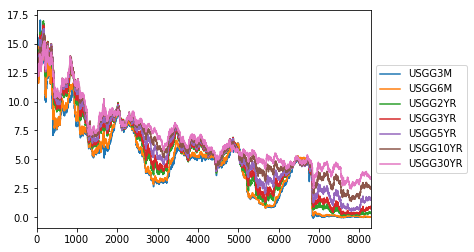

In [6]:
#%matplotlib inline
X_col = [col for col in data.columns if re.match(r'^USGG',col)]
ax = data[X_col].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

### Step 2. Linear Regression

In [7]:
def LR2way(X,y,df,out=True,Notreverse=True):
    slopes = []
    intercepts = []
    in_dex = []
    for x in X:
        if Notreverse: 
            lr = linear_model.LinearRegression().fit(df[[x]],df[y])
            in_dex.append(y + '-->' + x)
        else:
            lr = linear_model.LinearRegression().fit(df[[y]],df[x])
            in_dex.append(x + '-->' + y)
        slopes.append(lr.coef_)
        intercepts.append(lr.intercept_)
    ret = pd.DataFrame({'slopes':slopes,'intercepts':intercepts},index=in_dex)
    if out:
        display(ret)
    return ret

#### Task 1. Simple Regression -- Output Against Input Variables 

In [8]:
lr1 = LR2way(X_col,'Output1',df = data)

,slopes,intercepts
Output1-->USGG3M,[2.507560943753726],-11.723184
Output1-->USGG6M,[2.497234703367401],-12.097528
Output1-->USGG2YR,[2.4004493115970793],-13.055775
Output1-->USGG3YR,[2.4557926560923935],-13.861618
Output1-->USGG5YR,[2.568741597117223],-15.436649
Output1-->USGG10YR,[2.78699104908468],-18.063370
Output1-->USGG30YR,[3.069560862752194],-21.085905


#### Task 2. Simple Regression -- Input Against Output Variables 

In [9]:
lr2 = LR2way(X_col,'Output1',df = data,Notreverse=False)

,slopes,intercepts
USGG3M-->Output1,[0.38396090122797477],4.675134
USGG6M-->Output1,[0.39018695732704467],4.844370
USGG2YR-->Output1,[0.4151850590250118],5.438888
USGG3YR-->Output1,[0.4063541363030714],5.644458
USGG5YR-->Output1,[0.3860609575416489],6.009421
USGG10YR-->Output1,[0.3477544024577948],6.481316
USGG30YR-->Output1,[0.30471242175249547],6.869355


### Step 3. Logistic Regression

####  Prepare the easing-tightening data.

In [10]:
data['Binary_Output'] = np.nan
data.Binary_Output[data.Easing == 1] = 0
data.Binary_Output[data.Tightening == 1] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
print('NAs in Binary_Output:', sum(np.isnan(data.Binary_Output)))

NAs in Binary_Output: 5942


In [11]:
logit_data = data[pd.notnull(data.Binary_Output)]
logit_data.index = np.arange(len(logit_data))
print('logit_data shape:',logit_data.shape)
logit_data.head(10)

logit_data shape: (2358, 12)


,Date,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR,Output1,Easing,Tightening,Binary_Output
0,11/2/1981,12.69,12.87,14.119,14.44,14.614,14.572,14.412,21.820650,1.0,NaN,0.0
1,11/4/1981,12.30,12.50,14.119,14.13,14.324,14.182,13.962,21.015864,1.0,NaN,0.0
2,11/5/1981,12.18,12.59,14.209,14.23,14.434,14.192,14.062,21.159323,1.0,NaN,0.0
3,11/6/1981,11.68,12.20,13.869,13.88,14.074,13.942,13.852,20.241872,1.0,NaN,0.0
4,11/9/1981,11.19,11.63,13.179,13.25,13.544,13.392,13.562,18.804600,1.0,NaN,0.0
5,11/10/1981,11.15,11.57,13.229,13.23,13.634,13.402,13.552,18.813639,1.0,NaN,0.0
6,11/12/1981,10.60,11.25,12.779,12.85,13.234,13.192,13.212,17.805298,1.0,NaN,0.0
7,11/13/1981,10.78,11.31,12.839,12.93,13.314,13.182,13.262,17.997884,1.0,NaN,0.0
8,11/16/1981,10.63,11.10,12.699,12.79,13.214,13.072,13.112,17.620769,1.0,NaN,0.0
9,11/17/1981,10.63,11.08,12.719,12.85,13.214,13.182,13.252,17.726563,1.0,NaN,0.0


#### Task . plot data & run logistic regression on 'USGG3M' & all predictors

In [12]:
logit1 = linear_model.LogisticRegression().fit(logit_data[['USGG3M']],logit_data.Binary_Output)
logit2 = linear_model.LogisticRegression().fit(logit_data[X_col],logit_data.Binary_Output)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
probs1 = logit1.predict_proba(logit_data[['USGG3M']])
probs2 = logit2.predict_proba(logit_data[X_col])

In [14]:
print(probs1[0:5])
print(probs2[0:5])

[[0.45516287 0.54483713]
 [0.47250538 0.52749462]
 [0.47785688 0.52214312]
 [0.50019561 0.49980439]
 [0.52208739 0.47791261]]
[[0.69936635 0.30063365]
 [0.64002689 0.35997311]
 [0.49756229 0.50243771]
 [0.3899371  0.6100629 ]
 [0.40744327 0.59255673]]


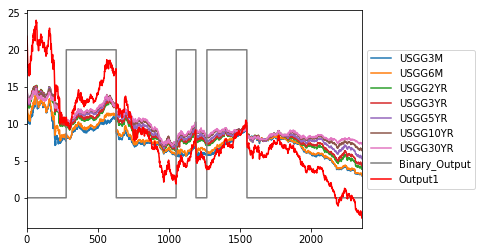

In [15]:
ax = logit_data[X_col].plot()
plt.plot(20*logit_data.Binary_Output)
plt.plot(logit_data.Output1,'r-',label = 'Output1')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

### Step 4. PCA

#### Task 1. correlation of the set of 3M, 2Y and 5Y yields

In [16]:
corrmat = data[['USGG3M','USGG2YR','USGG5YR']].corr()
corrmat

,USGG3M,USGG2YR,USGG5YR
USGG3M,1.000000,0.984314,0.960315
USGG2YR,0.984314,1.000000,0.991637
USGG5YR,0.960315,0.991637,1.000000


In [17]:
#sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

#### Task 2. Analyze the covariance matrix of the data

In [18]:
covmat = data[X_col].cov()
covmat

,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR
USGG3M,11.760393,11.855287,12.303031,11.942035,11.188856,9.924865,8.587987
USGG6M,11.855287,12.000510,12.512434,12.158422,11.406959,10.128890,8.768702
USGG2YR,12.303031,12.512434,13.284203,12.977542,12.279514,11.005377,9.600181
USGG3YR,11.942035,12.158422,12.977542,12.708647,12.068078,10.856033,9.497246
USGG5YR,11.188856,11.406959,12.279514,12.068078,11.543082,10.463386,9.212159
USGG10YR,9.924865,10.128890,11.005377,10.856033,10.463386,9.583483,8.510632
USGG30YR,8.587987,8.768702,9.600181,9.497246,9.212159,8.510632,7.624304


#### Task 3. Perform PCA manually

In [19]:
standardisedX = scale(data[X_col])
standardisedX = pd.DataFrame(standardisedX, index=data.index, columns=X_col)

In [20]:
standardisedX.head(5)

,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR
0,2.579328,2.380401,1.879560,1.861457,1.849871,1.831892,1.739428
1,2.596825,2.400609,1.917973,1.869872,1.826323,1.818970,1.739428
2,2.865114,2.614237,2.055165,2.001721,1.944063,1.906193,1.819108
3,2.940935,2.643106,2.101810,2.049410,1.964668,1.896501,1.826352
4,3.069247,2.729712,2.222539,2.141985,2.023538,1.967572,1.906032


In [21]:
## 1. Covariance matrix
covmat = standardisedX.cov()

## 2. Eigen values and Eigen vectors. 
##    Loadings are eigen vectors and eigen values represent the importance
eig_val,eig_vec = np.linalg.eig(covmat)

## 3. calculate principal components
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables 
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj) 
        pc[i] = valuei
    return pc

# calculate first principal component...
pc1 = calcpc(standardisedX, eig_vec[:,0])
pc1
# the same process to get pc2,pc3

array([ 5.33464166,  5.35280333,  5.7438603 , ..., -3.48714976,
       -3.49353631, -3.50782993])

In [22]:
#print(eig_val,eig_vec)

In [23]:
print(covmat)

            USGG3M    USGG6M   USGG2YR   USGG3YR   USGG5YR  USGG10YR  USGG30YR
USGG3M    1.000120  0.998053  0.984432  0.976945  0.960431  0.934984  0.907053
USGG6M    0.998053  1.000120  0.991121  0.984646  0.969307  0.944610  0.916828
USGG2YR   0.984432  0.991121  1.000120  0.998912  0.991756  0.975501  0.954034
USGG3YR   0.976945  0.984646  0.998912  1.000120  0.996506  0.983812  0.964940
USGG5YR   0.960431  0.969307  0.991756  0.996506  1.000120  0.994952  0.982093
USGG10YR  0.934984  0.944610  0.975501  0.983812  0.994952  1.000120  0.995755
USGG30YR  0.907053  0.916828  0.954034  0.964940  0.982093  0.995755  1.000120


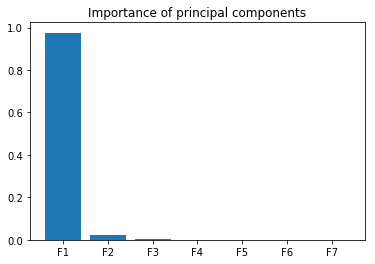

In [24]:
## 4. Display the importance of the factors
ratio = eig_val/sum(eig_val)
x = np.arange(7) + 1
plt.bar(x,height=ratio)
plt.xticks(x, ['F' + str(i) for i in x])
plt.title('Importance of principal components')
plt.show()
#print(ratio)

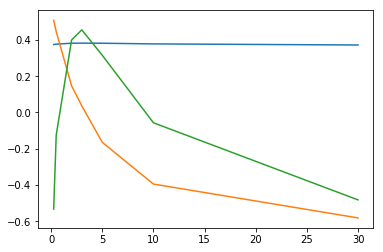

In [25]:
x = [0.25,0.5,2,3,5,10,30]
plt.plot(x,eig_vec[:,0])
plt.plot(x,eig_vec[:,1])
plt.plot(x,eig_vec[:,2])
plt.show()

Point(X,Y) stands for the coefficients for 7 different features when calculating principal components.   

#### Task 4. Interpret the factors by looking at the shapes of the loadings

#### Task 5. Perform the PCA by using the library sklearn

Please follow session 2 workshop file and the flow is pretty clear.